In [2]:
demand = []
cdemand = [] # TODO 这个cdemand是啥
fopen = open('/Users/zihanding/Developer/Psquare/newevaluation_dis/historydemand/slot20/groundtruth/24', 'r')
for line in fopen:
    line = line.strip().split(',')
    csum = 0
    one = []
    for k in line:
        one.append((float(k)))
        csum += (float(k))
    demand.append(csum) # 37 每个line所有的数据加起来是csum 从i出去的demandd
    cdemand.append(one) # 37x37 i到j的demand
fopen.close()

In [10]:
def createa(a,b,c):
    a += 1
    b += 1
    c += 12
    return a,b,c

def createb(a,b,c):
    a += 5
    b += 8
    return a,b,c


a,b,c = 1,1,1
d,e,f = createa(a,b,c)
print(d,e,f)
g,h,i = createb(a,b,c)
print(g,h,i)

2 2 13
6 9 1


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

legend_font = {"family" : "Times New Roman","size":22}

In [13]:
'''Served Passenger 处理， 保留每个timeslot的passenger serve情况'''
def passengerServeNew(exp,file_no,season):
    if exp == 'beta':
        fopen = open('/Users/zihanding/Developer/Psquare/newevaluation_dis/resultdata/beta/chargestatus/passenger-served-'+str(file_no), 'r')
    elif exp == 'baseline':
        fopen = open('/Users/zihanding/Developer/Yukun/newevaluation/resultdata/beta/chargestatus/passenger-served-'+str(file_no), 'r')
    else:
        return 'Please provide valid experiment type.'#     passenger_served_ratio = []
    
    result_served = [] # served passenger 54*37*37
    result_total = [] # total passenger demand 54*37*37
    count = 0
    ab = 0
    temp_s = []
    temp_t = []
    
    for line in fopen:
        if count == 37:
            if ab ==0:
                result_served.append(temp_s)
                temp_s = []
                ab = 1
            else:
                result_total.append(temp_t)
                temp_t = []
                ab = 0
            count = 0
        count += 1
        line = line.strip()[1:-1].split(',')
        for i in range(0,len(line)):
            line[i] = float(line[i])
        if ab == 0:
            temp_s.append(line)
        else:
            temp_t.append(line)
    if ab ==0:
        result_served.append(temp_s)
        temp_s = []
        ab = 1
    else:
        result_total.append(temp_t)
        temp_t = []
        ab = 0
    
    fopen.close()
    
    #result_served,result_total 54*37*37矩阵 分别是每个timeslot从i到j的passenger served和passenger demand
    return result_served, result_total

def passenger_serve(exp,file_no,season):
    served, demand = passengerServeNew(exp,file_no,season)
    result = []
    
    for i in range(len(demand)):
        ratio = []
        for j in range(len(demand[0])):
            cs,cd = 0,0
            for k in range(len(demand[0][0])):
                cs += served[i][j][k]
                cd += demand[i][j][k]
            if cd == 0:
                if cs !=0:
                    print('error!!!!!')
                ratio.append(1.0)
            else:
                ratio.append(cs/cd)
        result.append(ratio)
    return result
    
    #result 54*37的矩阵 每个timeslot，每个region的passenger serve情况
    
def passenger_serve_totalratio(exp,file_no,season):
    served, demand = passengerServeNew(exp,file_no,season)
    result = []
    for i in range(len(demand)):
        cs, cd = 0,0
        for j in range(len(demand[0])):
            for k in range(len(demand[0][0])):
                cs += served[i][j][k]
                cd += demand[i][j][k]
        if cd == 0:
            result.append(1.0)
        else:
            result.append(cs/cd)
    return result

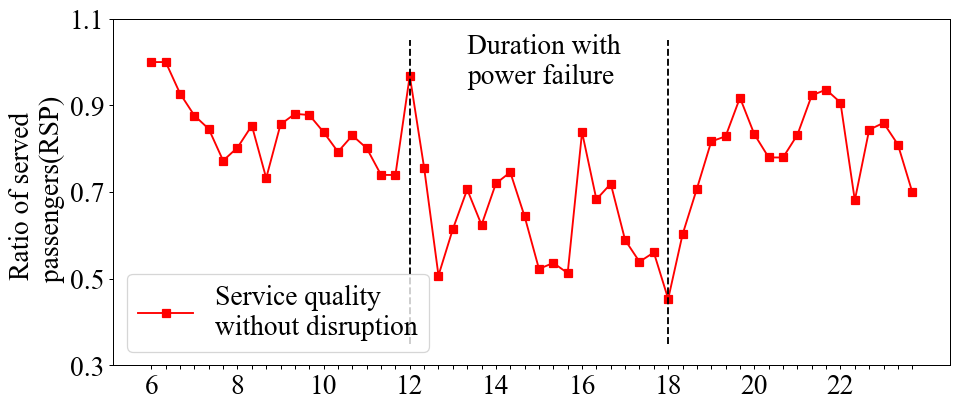

In [24]:
def figuretest():
    
    disruption = 32
    
    x = [m for m in range(18, 72)]
    res_dis = passenger_serve('beta',0,'Summer')
    
    y_dis_area=[]
    for i in range(len(res_dis)):
        y_dis_area.append(res_dis[i][disruption])
    plt.figure(figsize=(12,5),dpi=90)
    
    plt.plot(x,y_dis_area,'s-',color = 'r',label="Service quality \nwithout disruption")
    plt.ylabel("Ratio of served \n passengers(RSP)",fontproperties = legend_font)
#     plt.title("Ratio of Served Passengers (RSP) in Disruption area")
#     plt.ylim(0.3, 1.1) 
    plt.vlines([36, 54], 0.35, 1.05, linestyles='dashed', colors='black')
#     x = range(6,24,1)
    # plt.xlim(6,24)
    xt = range(18,72,6)
    yt = [int(x/3) for x in xt]
    plt.xticks(xt,yt,fontproperties = legend_font)
    plt.xticks(x,fontproperties = legend_font)
    plt.yticks(np.arange(0.3, 1.2, step=0.2),fontproperties = legend_font)
#     plt.grid(linestyle = '--', linewidth = 0.4)
    plt.legend(loc = "best",prop = legend_font)#图例
    plt.text(40,1.02,'Duration with', fontproperties = legend_font,color = 'black')
    plt.text(40,0.95,'power failure', fontproperties = legend_font,color = 'black')
figuretest()

In [ ]:
def figure1ServedPassenger():
    '''Disruption Happened in [32,6,2,1] in Summer 12pm to 6pm (Timeslot 36 to 54), Compared with baseline'''
    '''Passenger Served'''
    # res = passenger_serve('beta',25,'Summer')

    disruption = 32

    #data
    x = [m for m in range(18, 72)]
    res_dis = passenger_serve('beta',41,'Summer')
    res_base = passenger_serve('baseline',9,'Noseason')
    res_dis_winter = passenger_serve('beta',32,'Winter')

    y_dis_area,y_base,y_dis_win = [],[],[]
    for i in range(len(res_dis)):
        y_dis_area.append(res_dis[i][disruption])
        y_base.append(res_base[i][disruption])
        y_dis_win.append(res_dis_winter[i][disruption])
    # y_dis = passenger_serve_totalratio('beta',25,'Summer')

    #figure plot
    plt.figure(figsize=(12,9),dpi=90)
#     plt.title('Service Quality in Central Region',fontsize = 15 )

    plt.subplot(2,1,1)
    plt.plot(x,y_base,'s-',color = 'r',label="Service quality \nwithout disruption")
    plt.plot(x,y_dis_area,'^--',color = 'black',label="Service quality \nwith disruption (slot 1)")
#     plt.plot(x,y_dis_win,'o-',color = 'b',label="RSP in Disruption Area (Slot 2)")
    # plt.plot(x,result_disrupt_winter,'^-',color = 'g',label = 'disruption_winter')
#     plt.xlabel("Time of day (hour)",fontproperties = legend_font)
    plt.ylabel("Ratio of served \n passengers(RSP)",fontproperties = legend_font)
#     plt.title("Ratio of Served Passengers (RSP) in Disruption area")
    plt.ylim(0.3, 1.1) 
    plt.vlines([36, 54], 0.35, 1.05, linestyles='dashed', colors='black')
#     x = range(6,24,1)
    # plt.xlim(6,24)
    xt = range(18,72,6)
    yt = [int(x/3) for x in xt]
    plt.xticks(xt,yt,fontproperties = legend_font)
    plt.xticks(x,fontproperties = legend_font)
    plt.yticks(np.arange(0.3, 1.2, step=0.2),fontproperties = legend_font)
#     plt.grid(linestyle = '--', linewidth = 0.4)
    plt.legend(loc = "best",prop = legend_font)#图例
    plt.text(40,1.02,'Duration with', fontproperties = legend_font,color = 'black')
    plt.text(40,0.95,'power failure', fontproperties = legend_font,color = 'black')
    
    
    
    plt.subplot(2,1,2)
    plt.plot(x,y_base,'s-',color = 'r',label="Service quality \nwithout disruption")
    plt.plot(x,y_dis_win,'o-',color = 'b',label="Service quality \nwith disruption (slot 2)")
    plt.xlabel("Time of day (hour)",fontproperties = legend_font)
    plt.ylabel("Ratio of served \n passengers(RSP)",fontproperties = legend_font)
#     plt.title("Ratio of Served Passengers (RSP) in Disruption area")
    plt.ylim(0.3, 1.1) 
    plt.vlines([48, 60], 0.35, 1.05, colors='blue')
    plt.xticks(xt,yt,fontproperties = legend_font)
    plt.xticks(x,fontproperties = legend_font)
    plt.yticks(np.arange(0.3, 1.2, step=0.2), fontproperties = legend_font)
    plt.legend(loc = "best",prop = legend_font)#图例
    
    
    plt.text(49,1.02,'Duration with', fontproperties = legend_font,color = 'b')
    plt.text(49,0.95,'power failure', fontproperties = legend_font,color = 'b')


    plt.show()
figure1ServedPassenger()